# Logistic Regression
Logistic regression is a linear model used for binary classification problems. It models the probability of the default class (usually the positive class) given the input features.
Logistic regression computes a linear decision boundary, which separates the classes in the feature space.
It learns the coefficients (weights) of the input features through optimization methods such as gradient descent.
Logistic regression is generally faster to train and evaluate compared to kNN, especially with large datasets.
Cross-validation for logistic regression typically involves splitting the data into folds, training the model on multiple folds, and evaluating on the remaining fold to estimate performance metrics like accuracy, precision, recall, etc.
Logistic regression's cross-validation focuses on optimizing the model's parameters (like regularization strength) to minimize error in predictions.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv("data.csv") 

print (data.head) 


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(['Unnamed: 32', 'id'], axis = 1, inplace=True) 

# convert diagnosis from categorical to binary values
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] 

In [5]:
y = data.diagnosis.values 
x_data = data.drop(['diagnosis'], axis = 1) 

# normalisation
#x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.15, random_state = 42) 
  
x_train = x_train.T 
x_test = x_test.T 
y_train = y_train.T 
y_test = y_test.T 
  
print("x train: ", x_train.shape) 
print("x test: ", x_test.shape) 
print("y train: ", y_train.shape) 
print("y test: ", y_test.shape) 

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


In [7]:
print("NaN in x_train:", np.isnan(x_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("NaN in x_test:", np.isnan(x_test).any())
print("NaN in y_test:", np.isnan(y_test).any())

NaN in x_train: False
NaN in y_train: False
NaN in x_test: False
NaN in y_test: False


In [8]:
def initialize_weights_and_bias(dimension):
    # randomized weights to ensure no uniformity
    w = np.random.randn(dimension, 1) * 0.01
    b = 0.0
    return w, b

# sigmoid function
def sigmoid(z): 
    y_head = 1/(1 + np.exp(-z)) 
    return y_head 


In [9]:
'''
Forward Propagation:

    1. Input: We start with input features X and weights W (including a bias term).
    2. Linear combination: We compute Z = W * X + b, where b is the bias term.
    3. Activation: We apply the sigmoid function σ(Z) to get the predicted probability:
        Y_pred = σ(Z) = 1 / (1 + e^(-Z))


Backward Propagation:

    1. Compute the error: We calculate the difference between the predicted value and the actual value.
        Error = Y_pred - Y_actual
    2. Compute the gradient: We calculate how much each weight contributed to the error.
        dW = (1/m) * X * (Y_pred - Y_actual)
        db = (1/m) * sum(Y_pred - Y_actual)
        Where m is the number of training examples.
    3. Update weights and bias: We adjust the weights and bias using the calculated gradients.
        W = W - learning_rate * dW
        b = b - learning_rate * db
        The learning rate determines how big of a step we take in the direction of the gradient.
'''

'\nForward Propagation:\n\n    1. Input: We start with input features X and weights W (including a bias term).\n    2. Linear combination: We compute Z = W * X + b, where b is the bias term.\n    3. Activation: We apply the sigmoid function σ(Z) to get the predicted probability:\n        Y_pred = σ(Z) = 1 / (1 + e^(-Z))\n\n\nBackward Propagation:\n\n    1. Compute the error: We calculate the difference between the predicted value and the actual value.\n        Error = Y_pred - Y_actual\n    2. Compute the gradient: We calculate how much each weight contributed to the error.\n        dW = (1/m) * X * (Y_pred - Y_actual)\n        db = (1/m) * sum(Y_pred - Y_actual)\n        Where m is the number of training examples.\n    3. Update weights and bias: We adjust the weights and bias using the calculated gradients.\n        W = W - learning_rate * dW\n        b = b - learning_rate * db\n        The learning rate determines how big of a step we take in the direction of the gradient.\n'

In [10]:
def forward_backward_propagation(w, b, x_train, y_train):
    # Small value to avoid log(0)
    epsilon = 1e-15
    
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    
    # Clip y_head to avoid log(0) or log(1)
    y_head_clipped = np.clip(y_head, epsilon, 1 - epsilon)
    
    # x_train.shape[1]  is for scaling 
    loss = - y_train * np.log(y_head_clipped) - (1 - y_train) * np.log(1 - y_head_clipped)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

In [11]:
# update weights
def update(w, b, x_train, y_train, learning_rate, num_iter):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(num_iter):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return {"weight": w, "bias": b}, gradients, cost_list

In [12]:
# predict values
def predict(w, b, x_test): 
    # x_test is a input for forward propagation 
    z = sigmoid(np.dot(w.T, x_test)+b) 
    Y_prediction = np.zeros((1, x_test.shape[1])) 
  
    # if z is bigger than 0.5, our prediction is sign one (y_head = 1), 
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0), 
    for i in range(z.shape[1]): 
        if z[0, i]<= 0.5: 
            Y_prediction[0, i] = 0
        else: 
            Y_prediction[0, i] = 1
  
    return Y_prediction 

Cost after iteration 0: 0.692586
Cost after iteration 10: 0.689446
Cost after iteration 20: 0.686358
Cost after iteration 30: 0.683319
Cost after iteration 40: 0.680323
Cost after iteration 50: 0.677370
Cost after iteration 60: 0.674455
Cost after iteration 70: 0.671576
Cost after iteration 80: 0.668733
Cost after iteration 90: 0.665922


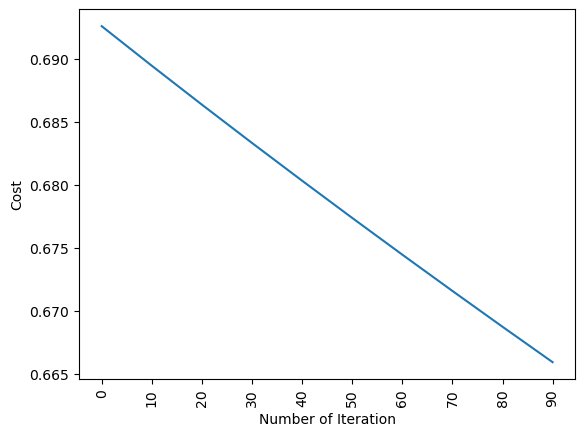

Fold 1 validation accuracy: 80.70%
Cost after iteration 0: 0.691437
Cost after iteration 10: 0.688584
Cost after iteration 20: 0.685790
Cost after iteration 30: 0.683048
Cost after iteration 40: 0.680354
Cost after iteration 50: 0.677703
Cost after iteration 60: 0.675093
Cost after iteration 70: 0.672519
Cost after iteration 80: 0.669980
Cost after iteration 90: 0.667473


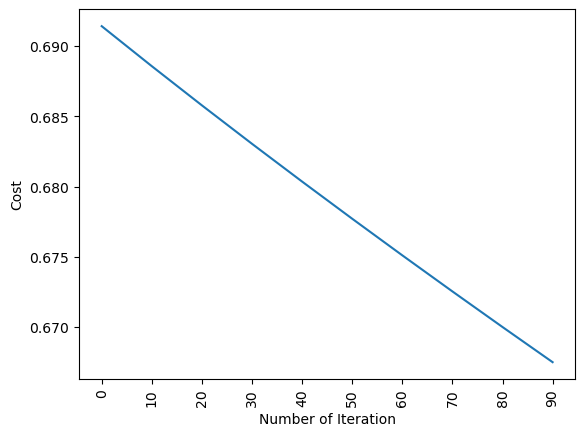

Fold 2 validation accuracy: 74.56%
Cost after iteration 0: 0.693747
Cost after iteration 10: 0.690323
Cost after iteration 20: 0.687001
Cost after iteration 30: 0.683772
Cost after iteration 40: 0.680625
Cost after iteration 50: 0.677550
Cost after iteration 60: 0.674542
Cost after iteration 70: 0.671593
Cost after iteration 80: 0.668698
Cost after iteration 90: 0.665852


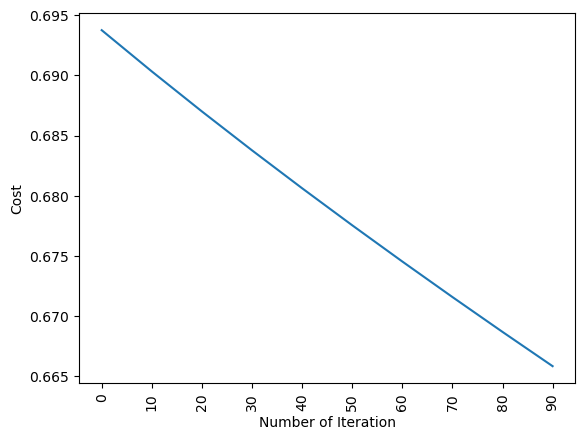

Fold 3 validation accuracy: 59.65%
Cost after iteration 0: 0.692794
Cost after iteration 10: 0.690054
Cost after iteration 20: 0.687340
Cost after iteration 30: 0.684652
Cost after iteration 40: 0.681989
Cost after iteration 50: 0.679349
Cost after iteration 60: 0.676734
Cost after iteration 70: 0.674142
Cost after iteration 80: 0.671573
Cost after iteration 90: 0.669026


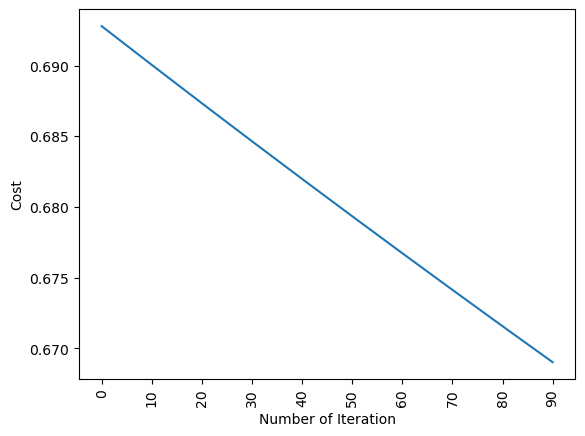

Fold 4 validation accuracy: 92.11%
Cost after iteration 0: 0.694434
Cost after iteration 10: 0.690674
Cost after iteration 20: 0.687075
Cost after iteration 30: 0.683617
Cost after iteration 40: 0.680281
Cost after iteration 50: 0.677055
Cost after iteration 60: 0.673924
Cost after iteration 70: 0.670879
Cost after iteration 80: 0.667909
Cost after iteration 90: 0.665007


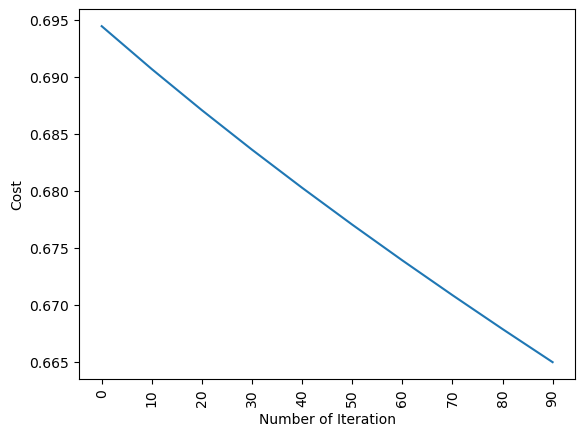

Fold 5 validation accuracy: 55.75%

Cross-validation results:
Mean accuracy: 72.55%
Standard deviation: 13.43%


In [14]:
from sklearn.model_selection import KFold

# kfold cross validation uses all data for both training and validation
def logistic_regression_cv(X, y, learning_rate, num_iterations, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    fold_accuracies = []
    
    # kfold expects samples in rows but features are in rows and samples in columns. need kf.split()
    for fold, (train_index, val_index) in enumerate(kf.split(X.T), 1):
        
        X_train, X_val = X[:, train_index], X[:, val_index] # selecting appropriate columns for each fold
        y_train, y_val = y[train_index], y[val_index] # y is already in correct shape
        
        dimension = X_train.shape[0]
        w, b = initialize_weights_and_bias(dimension)
        
        parameters, gradients, cost_list = update(w, b, X_train, y_train, learning_rate, num_iterations)
        
        y_prediction_val = predict(parameters["weight"], parameters["bias"], X_val)
        
        # Validation Accuracy
        val_accuracy = 100 - np.mean(np.abs(y_prediction_val - y_val)) * 100
        fold_accuracies.append(val_accuracy)
        
        print(f"Fold {fold} validation accuracy: {val_accuracy:.2f}%")
    
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    
    print(f"\nCross-validation results:")
    print(f"Mean accuracy: {mean_accuracy:.2f}%")
    print(f"Standard deviation: {std_accuracy:.2f}%")
    
    return mean_accuracy, std_accuracy

# Usage
X = np.hstack((x_train, x_test))  # Combine train and test data horizontally (30, 569)
y = np.concatenate((y_train, y_test))  # Combine train and test labels (569,)
mean_accuracy, std_accuracy = logistic_regression_cv(X, y, learning_rate=0.01, num_iterations=100, k_folds=5)

Cost after iteration 0: 0.693913
Cost after iteration 10: 0.690836
Cost after iteration 20: 0.687832
Cost after iteration 30: 0.684895
Cost after iteration 40: 0.682017
Cost after iteration 50: 0.679193
Cost after iteration 60: 0.676418
Cost after iteration 70: 0.673687
Cost after iteration 80: 0.670998
Cost after iteration 90: 0.668347


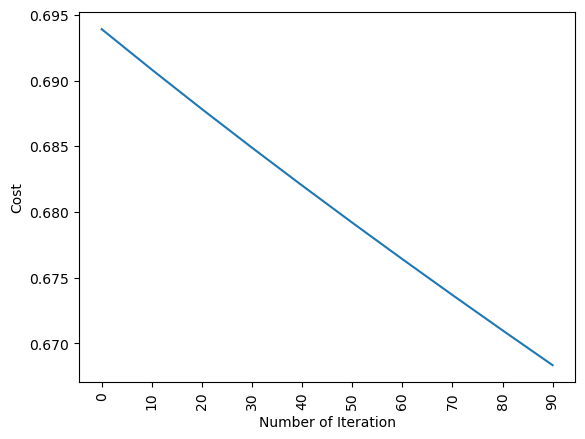

train accuracy: 74.53 %
test accuracy: 75.58 %


In [13]:
from sklearn.model_selection import KFold

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)


    # train / test Errors 
    train_accuracy = 100 - np.mean(np.abs(y_prediction_train - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
    
    print("train accuracy: {:.2f} %".format(train_accuracy))
    print("test accuracy: {:.2f} %".format(test_accuracy))

logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=100)

In [ ]:
'''
Logistic regression is a linear model used for binary classification problems. 
It models the probability of the default class (usually the positive class) given the input features.

'''